logistic casestudy
Inside logistic function
First five records of dataset

   Passengerid   Age     Fare  Sex  sibsp  Parch  zero  Pclass  Embarked  \
0            1  22.0   7.2500    0      1      0     0       3       2.0   
1            2  38.0  71.2833    1      1      0     0       1       0.0   
2            3  26.0   7.9250    1      0      0     0       3       2.0   
3            4  35.0  53.1000    1      1      0     0       1       2.0   
4            5  35.0   8.0500    0      0      0     0       3       2.0   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 no

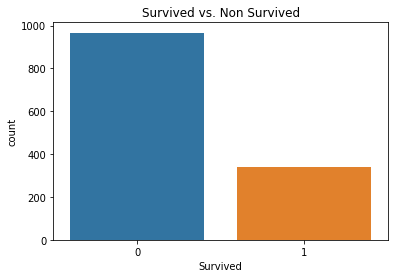

Visualisation according to gender: 



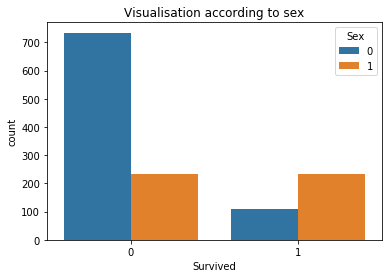

Visualization according to passenger class: 



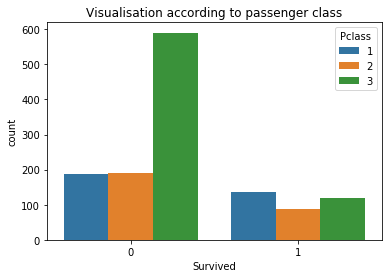

Survived vs. Non Survived based on age



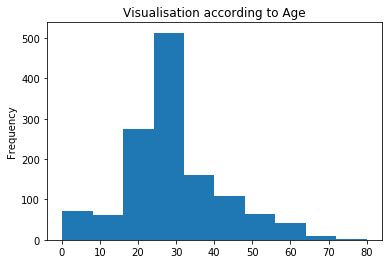

Data after column removal

   Passengerid   Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived
0            1  22.0   7.2500    0      1      0       3       2.0         0
1            2  38.0  71.2833    1      1      0       1       0.0         1
2            3  26.0   7.9250    1      0      0       3       2.0         1
3            4  35.0  53.1000    1      1      0       1       2.0         1
4            5  35.0   8.0500    0      0      0       3       2.0         0
   0  1
0  1  0
1  0  1
2  0  1
3  0  1
4  1  0
Sex column after updation
   1
0  0
1  1
2  1
3  1
4  0
   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1
Data after concatination: 

   Passengerid   Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived  \
0            1  22.0   7.2500    0      1      0       3       2.0         0   
1            2  38.0  71.2833    1      1      0       1       0.0         1   
2            3  26.0   7.9250    1      0      0       3       2.0       

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,show
from seaborn import countplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def TitanicLogistic():
    print("Inside logistic function")
    #step1-load Data
    titanic_Data=pd.read_csv('MarvellousTitanicDataset.csv')
    print("First five records of dataset\n")
    print(titanic_Data.head())
    print("Total number of records are ",titanic_Data.info())
    #step2-Analysis of data
    print("\n")
    print("visualisation of survived and non survived passengers: \n")
    figure()
    countplot(data=titanic_Data,x="Survived").set_title("Survived vs. Non Survived")
    show()
    print("Visualisation according to gender: \n")
    figure()
    countplot(data=titanic_Data,x="Survived",hue="Sex").set_title("Visualisation according to sex")
    show()
    print("Visualization according to passenger class: \n")
    figure()
    countplot(data=titanic_Data,x="Survived",hue="Pclass").set_title("Visualisation according to passenger class")
    show()
    print("Survived vs. Non Survived based on age\n")
    figure()
    titanic_Data["Age"].plot.hist().set_title("Visualisation according to Age")
    show()
    
    #step3-Data Cleaning
    titanic_Data.drop("zero",axis=1,inplace=True)
    print("Data after column removal\n")
    print(titanic_Data.head())
    
    Sex=pd.get_dummies(titanic_Data["Sex"])
    print(Sex.head())
    
    Sex=pd.get_dummies(titanic_Data["Sex"],drop_first=True)
    print("Sex column after updation")
    print(Sex.head())
    
    Pclass=pd.get_dummies(titanic_Data["Pclass"])
    print(Pclass.head())
    
    #concat Sex and Pclass field in our dataset
    titanic_Data=pd.concat([titanic_Data,Sex,Pclass],axis=1)
    print("Data after concatination: \n")
    print(titanic_Data.head())
    
    #removing unnecessary fields
    titanic_Data.drop(["Sex","sibsp","Parch","Embarked"],axis=1,inplace=True)
    print("Data after columns removal\n")
    print(titanic_Data.head())
    
    #divide the dataset into x and y
    x=titanic_Data.drop("Survived",axis=1)
    y=titanic_Data["Survived"]
    
    #split the data for training and testing purpose
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5)
    
    obj=LogisticRegression(max_iter=2000)
    
    #step-4 -Train the dataset
    obj.fit(xtrain,ytrain)
    
    #step-5-Testing
    output=obj.predict(xtest)
    
    print("\nAccuracy of given dataset is:\n")
    print(accuracy_score(ytest,output))
    
    print("Confusion matrix is:\n")
    print(confusion_matrix(ytest,output))
    
def main():
    print("logistic casestudy")
    TitanicLogistic()
if __name__=="__main__":
    main()